In [2]:
# loading required libraries
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading input data
data = pd.read_csv('data2023.csv')
data.head()

,Unnamed: 0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19,doc20
0,A,0,6,5,7,9,13,16,12,14,...,17,27,32,17,28,28,47,41,35,32
1,A-tu,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
2,A.,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,ABC,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aah,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21155 entries, 0 to 21154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21154 non-null  object
 1   doc1        21155 non-null  int64 
 2   doc2        21155 non-null  int64 
 3   doc3        21155 non-null  int64 
 4   doc4        21155 non-null  int64 
 5   doc5        21155 non-null  int64 
 6   doc6        21155 non-null  int64 
 7   doc7        21155 non-null  int64 
 8   doc8        21155 non-null  int64 
 9   doc9        21155 non-null  int64 
 10  doc10       21155 non-null  int64 
 11  doc11       21155 non-null  int64 
 12  doc12       21155 non-null  int64 
 13  doc13       21155 non-null  int64 
 14  doc14       21155 non-null  int64 
 15  doc15       21155 non-null  int64 
 16  doc16       21155 non-null  int64 
 17  doc17       21155 non-null  int64 
 18  doc18       21155 non-null  int64 
 19  doc19       21155 non-null  int64 
 20  doc20 

In [5]:
# cosine similarity function

# using simple calculations
def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

# using dot product function
def cosine(v1,v2):
    
    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

# using numpy version of dot product function
def cosine_np(v1,v2):
    return np.dot(v1,v2)/np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))

In [8]:
# one pair similarity measurements

# simple cosine function
def one_pair_cosine_similarity(docmatrix):
    docA = docmatrix[:,0]
    docB = docmatrix[:,1]
    sim = cosine(docA,docB)
    return sim

# numpy cosine function
def one_pair_cosine_np_similarity(docmatrix):
    docA = docmatrix[:,0]
    docB = docmatrix[:,1]
    sim = cosine_np(docA,docB)
    return sim

In [9]:
# all pairs similarity measurements

# simple methods
def all_pairs_cosine_similarity(docmatrix):
    sim_vec = []
    docvectors = np.transpose(docmatrix)
    for docA in docvectors:
        for docB in docvectors:
            sim_vec.append(cosine(docA,docB))
    return sim_vec

# numpy methods
def all_pairs_cosine_np_similarity(docmatrix):
    sim_vec = []
    docvectors = np.transpose(docmatrix)
    for docA in docvectors:
        for docB in docvectors:
            sim_vec.append(cosine_np(docA,docB))
    return sim_vec

In [10]:
# algorithm mean time function
def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

Text(0.5, 1.0, 'one pair cosine similarity with numpy')

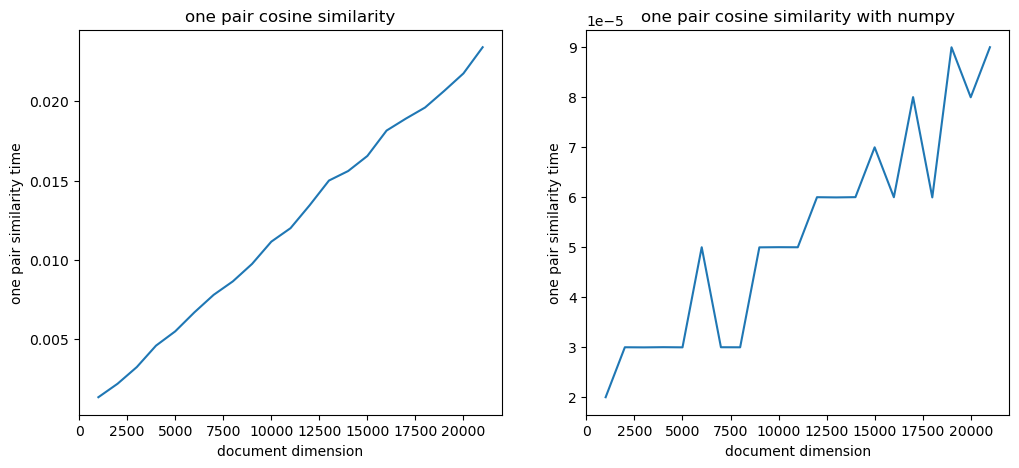

In [11]:
# one pair cosine similarity analysis
xs1 = []
ys1 = []
for n in range(1000,21155,1000):
    docmatrix = data.iloc[:n,1:3].to_numpy()
    (mean,stdev)=timeit(one_pair_cosine_similarity,docmatrix,repeats=20)
    xs1.append(n)
    ys1.append(mean)
    
xs2 = []
ys2 = []
for n in range(1000,21155,1000):
    docmatrix = data.iloc[:n,1:3].to_numpy()
    (mean,stdev)=timeit(one_pair_cosine_np_similarity,docmatrix,repeats=100)
    xs2.append(n)
    ys2.append(mean)
    
fig,ax = plt.subplots(1,2,figsize = [12,5])
ax[0].plot(xs1,ys1)
ax[0].set_xlabel('document dimension')
ax[0].set_ylabel('one pair similarity time')
ax[0].set_title('one pair cosine similarity')

ax[1].plot(xs2,ys2)
ax[1].set_xlabel('document dimension')
ax[1].set_ylabel('one pair similarity time')
ax[1].set_title('one pair cosine similarity with numpy')

In [12]:
# Jaccard similarity function
def jaccard(doc1,doc2):
    intersection = []
    for i in range(len(doc1)):
        intersection.append(min(doc1[i],doc2[i]))
    union = np.sum(doc1)+np.sum(doc2)-np.sum(intersection)
    return np.sum(intersection)/union

Text(0.5, 1.0, 'one pair time complexity')

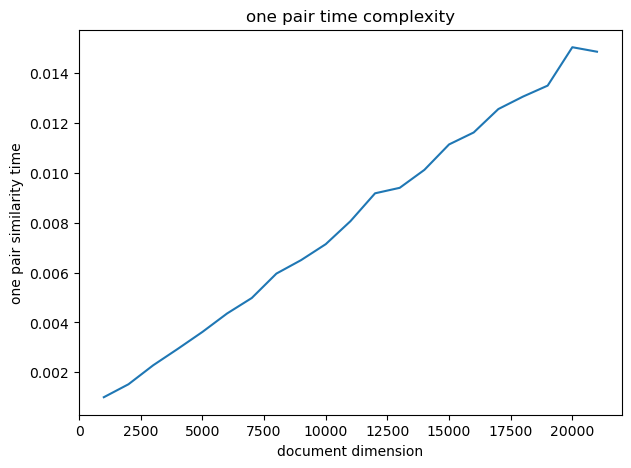

In [13]:
# one pair jaccard similarity analysis
xs1 = []
ys1 = []
for n in range(1000,21155,1000):
    docmatrix = data.iloc[:n,1:3].to_numpy()
    (mean,stdev)=timeit(jaccard,docmatrix[:,0],docmatrix[:,1],repeats=50)
    xs1.append(n)
    ys1.append(mean)
        
fig,ax = plt.subplots(figsize = [7,5])
ax.plot(xs1,ys1)
ax.set_xlabel('document dimension')
ax.set_ylabel('one pair similarity time')
ax.set_title('one pair time complexity')